In [16]:
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir("/Users/saimanikant/Desktop/PhD/Sem 2/Introduction to Machine Learning Applications/Project/Data")
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [17]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
df_train=df_train.drop(columns=['Id'])
df_train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [19]:
#identify the numeric columns and separate them from the character columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_train_numeric=df_train.select_dtypes(include=numerics)
df_train_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [20]:
#there are 33 numeric columns. Now lets descirbe them
df_train_numeric.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [21]:
#cleaning the data
#to check if the data has any NA values
print(df_train_numeric.columns[df_train_numeric.isnull().any()])
#these three have missing values
print(df_train_numeric['LotFrontage'].describe(),df_train_numeric['MasVnrArea'].describe(),df_train_numeric['GarageYrBlt'].describe())
#as we can see there are not a lot of missing values. So we eliminate the missiing values



#now lets store the index of the dropped rows in only_na
na_free = df_train_numeric.dropna()
only_na = df_train_numeric[~df_train_numeric.index.isin(na_free.index)]


Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [22]:
df_train_numeric=df_train_numeric.dropna()
df_train_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

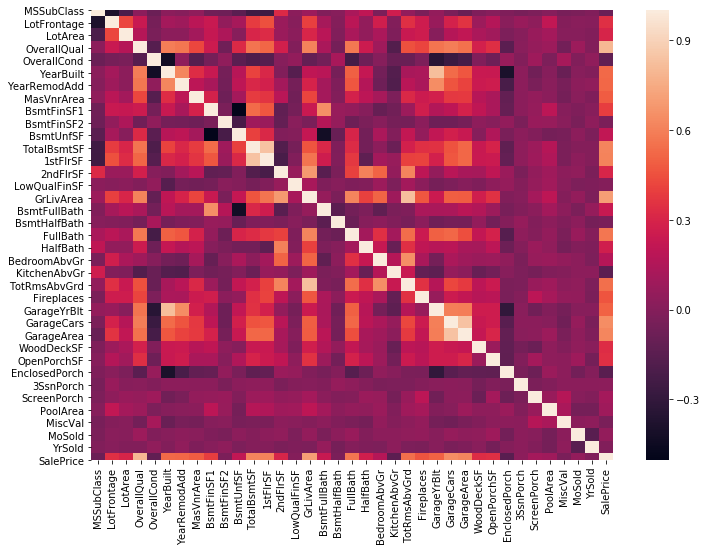

In [23]:
#plots for the numeric variables
#to have a sense of the data
#corr heat map
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_train_numeric.corr())




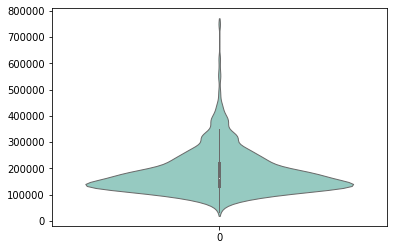

In [24]:
#To see the distribution
sns.violinplot(data=df_train_numeric['SalePrice'], palette="Set3", bw=.2, cut=1, linewidth=1)

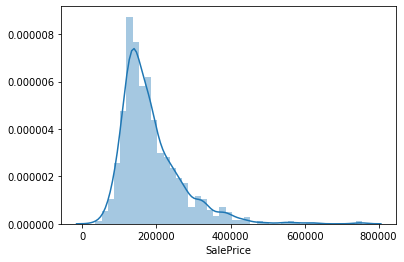

In [25]:
sns.distplot(df_train_numeric['SalePrice'])

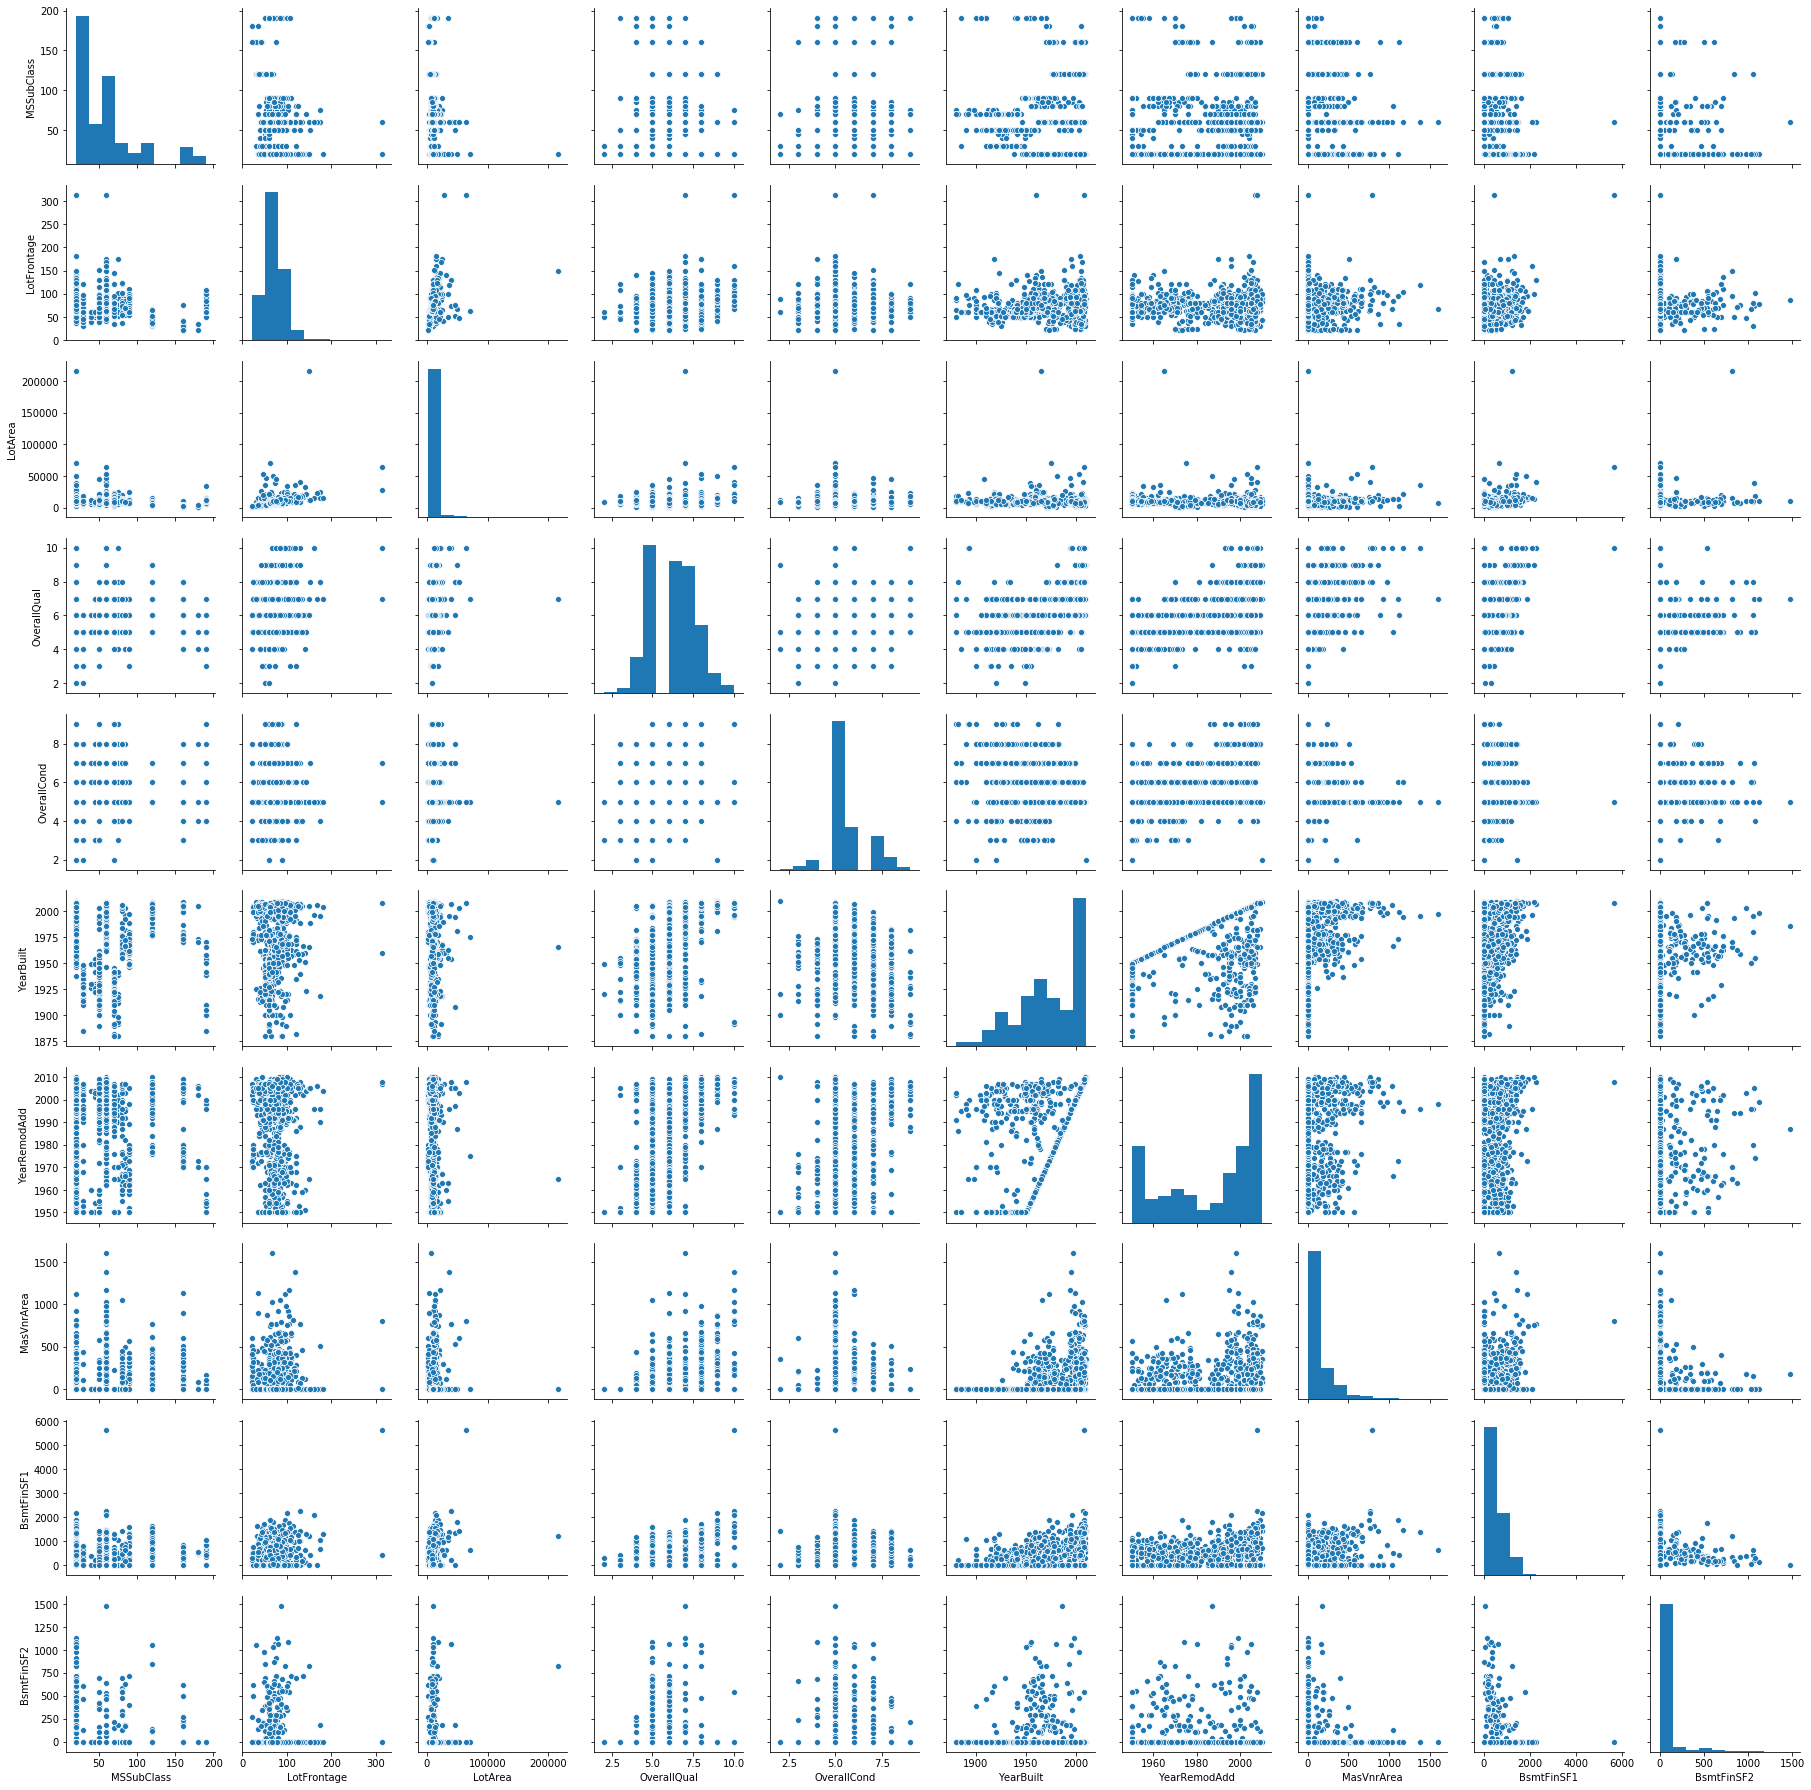

In [26]:
#to have a sense of the pairwise plots
sns.pairplot(df_train_numeric.iloc[:,0:10])

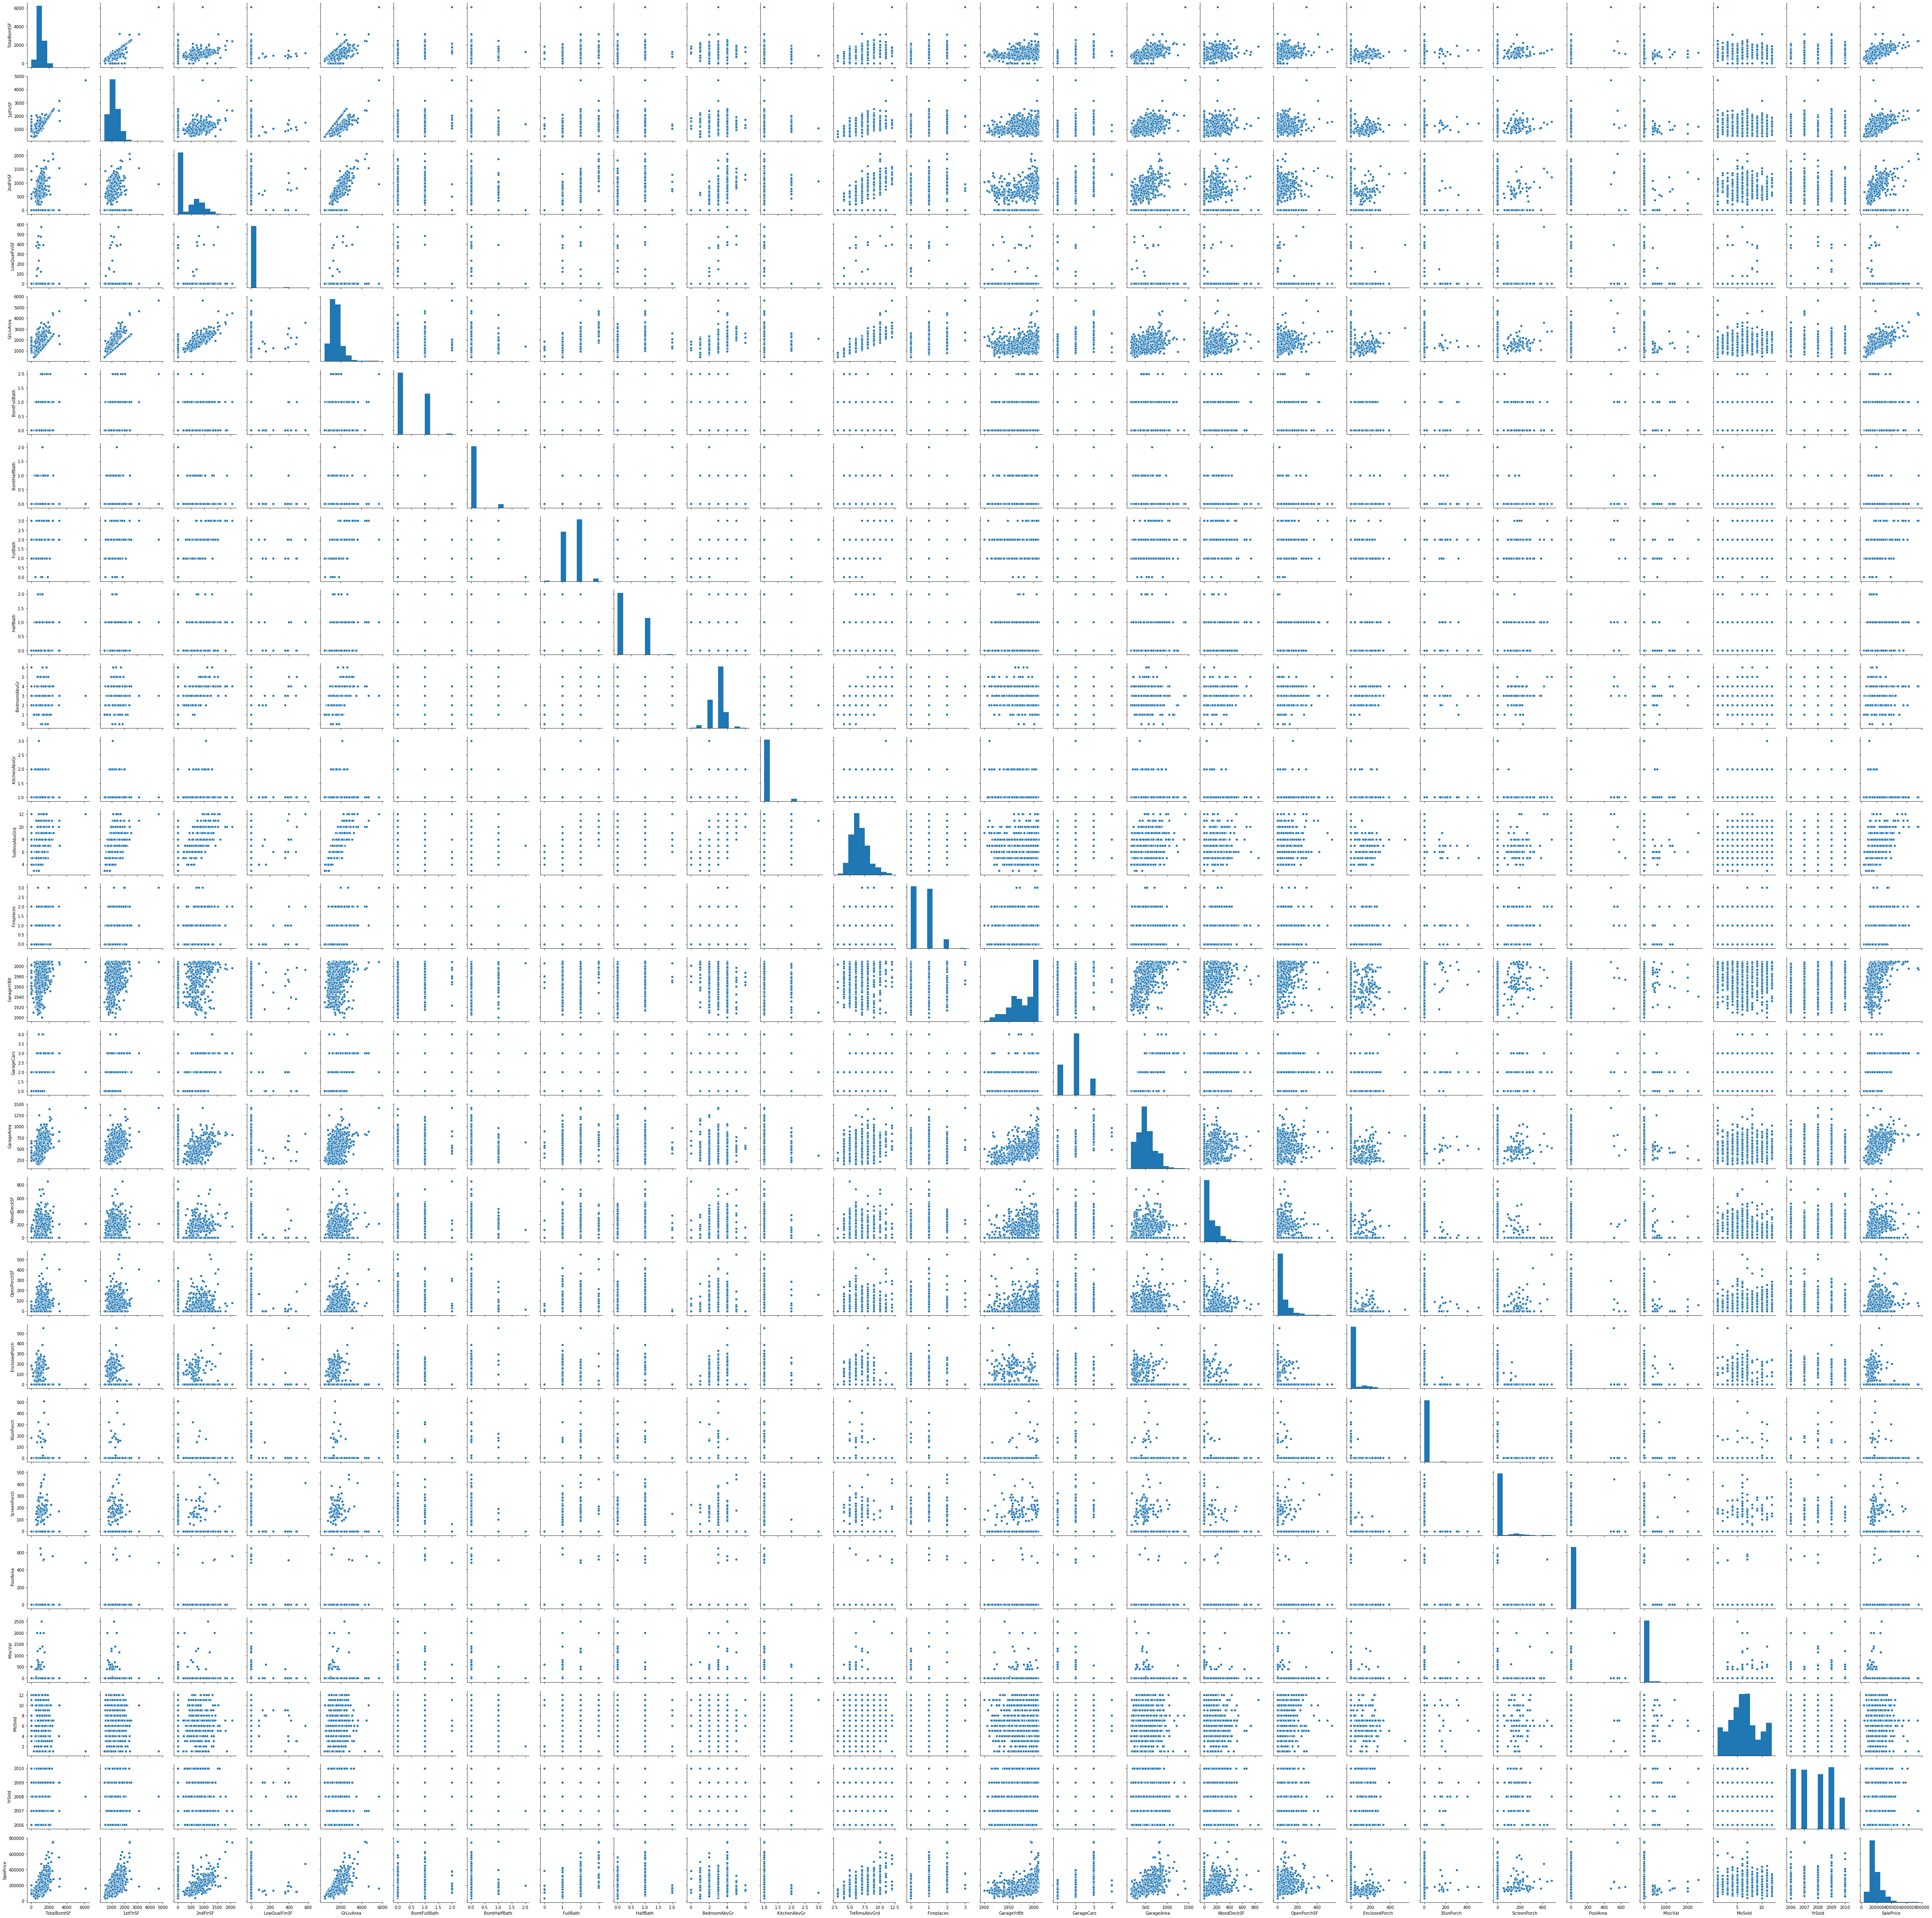

In [34]:
#to have a sense of the pairwise plots
sns.pairplot(df_train_numeric.iloc[:,11:38])

In [27]:
#we do PCA on the numeric variables to identify the necessary variables
#we also drop year sold
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=1)
pca_1.fit(df_train_numeric.iloc[:,0:35])
print(sum(pca_1.explained_variance_ratio_))

pca_2 = PCA(n_components=2)
pca_2.fit(df_train_numeric.iloc[:,0:35])
print(sum(pca_2.explained_variance_ratio_))

#just two components explain majority of the variance

0.9804465988801344
0.9877543124822702


In [28]:
#extracting the pricipal components from the PCA data

df_train_pc=pd.DataFrame(pca_2.transform(df_train_numeric.iloc[:,0:35]),columns=['1st PC',"2nd PC"])
df_train_pc

1st PC      2nd PC
0    -1671.671575  -16.202338
1     -518.154945   -4.612145
2     1127.784813    8.529420
3     -578.998934 -131.014080
4     4156.646592  527.896097
...           ...         ...
1116 -2212.978463  -21.609856
1117  3087.105106  889.207149
1118 -1062.711095  637.020927
1119  -421.708319 -670.834408
1120  -182.957931 -113.942254

[1121 rows x 2 columns]

In [29]:
########################################## This is the end of the numeric columns data analysis

In [30]:
########################################## This is the beginning of the categorical columns data analysis
df_train_categorical=df_train.select_dtypes(exclude=["number"])
df_train_categorical.head()
#there are 43 categorical columns

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [31]:
#now we choose the rows with same index as the df_train_numeric
df_train_cat=df_train_categorical.drop(only_na.index.values)
df_train_cat

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1121 rows x 43 columns]

In [32]:
#here we take judegement call which are the most important variables in the dataset and only keep those
df_train_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
# so we keep the two quality variables of kitchen quality, Utilities, 
print(df_train['KitchenQual'].unique())
print(df_train['SaleCondition'].unique())
df_train_cat=df_train_cat[['KitchenQual','SaleType']]
df_train_cat['Sales']=df_train_numeric['SalePrice']
df_train_cat=df_train_cat.reset_index()
df_train_cat=df_train_cat.drop(columns=['index'])
df_train_cat

['Gd' 'TA' 'Ex' 'Fa']
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


KitchenQual SaleType   Sales
0             Gd       WD  208500
1             TA       WD  181500
2             Gd       WD  223500
3             Gd       WD  140000
4             Gd       WD  250000
...          ...      ...     ...
1116          TA       WD  175000
1117          TA       WD  210000
1118          Gd       WD  266500
1119          Gd       WD  142125
1120          TA       WD  147500

[1121 rows x 3 columns]

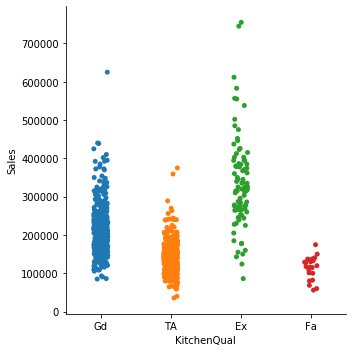

In [34]:
sns.catplot(x="KitchenQual", y="Sales", data=df_train_cat);

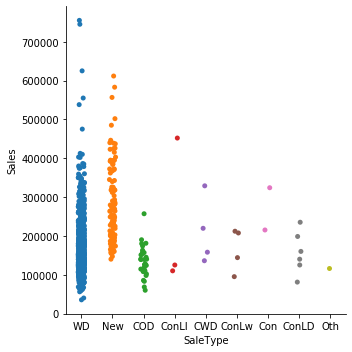

In [35]:
sns.catplot(x="SaleType", y="Sales", data=df_train_cat);
#As we can see all the values are widely distributed

In [36]:
#final dataset
df1=pd.concat([df_train_pc,df_train_cat.iloc[:,0:2]],axis=1)
df1

1st PC      2nd PC KitchenQual SaleType
0    -1671.671575  -16.202338          Gd       WD
1     -518.154945   -4.612145          TA       WD
2     1127.784813    8.529420          Gd       WD
3     -578.998934 -131.014080          Gd       WD
4     4156.646592  527.896097          Gd       WD
...           ...         ...         ...      ...
1116 -2212.978463  -21.609856          TA       WD
1117  3087.105106  889.207149          TA       WD
1118 -1062.711095  637.020927          Gd       WD
1119  -421.708319 -670.834408          Gd       WD
1120  -182.957931 -113.942254          TA       WD

[1121 rows x 4 columns]

In [37]:
df2=pd.get_dummies(df1, columns=["KitchenQual", "SaleType"], prefix=["Kitchen", "SaleType"])
df2['Sales']=df_train_cat['Sales']
df2=df2.drop(columns=['Kitchen_TA','SaleType_WD'])

#drop sales rows with NAN
df2=df2.dropna()
df2

1st PC      2nd PC  Kitchen_Ex  Kitchen_Fa  Kitchen_Gd  \
0    -1671.671575  -16.202338           0           0           1   
1     -518.154945   -4.612145           0           0           0   
2     1127.784813    8.529420           0           0           1   
3     -578.998934 -131.014080           0           0           1   
4     4156.646592  527.896097           0           0           1   
...           ...         ...         ...         ...         ...   
1116 -2212.978463  -21.609856           0           0           0   
1117  3087.105106  889.207149           0           0           0   
1118 -1062.711095  637.020927           0           0           1   
1119  -421.708319 -670.834408           0           0           1   
1120  -182.957931 -113.942254           0           0           0   

      SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                0             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
...            ...           ...           ...             ...   
1116             0             0             0               0   
1117             0             0             0               0   
1118             0             0             0               0   
1119             0             0             0               0   
1120             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth   Sales  
0                  0               0             0             0  208500  
1                  0               0             0             0  181500  
2                  0               0             0             0  223500  
3                  0               0             0             0  140000  
4                  0               0             0             0  250000  
...              ...             ...           ...           ...     ...  
1116               0               0             0             0  175000  
1117               0               0             0             0  210000  
1118               0               0             0             0  266500  
1119               0               0             0             0  142125  
1120               0               0             0             0  147500  

[1121 rows x 14 columns]

In [38]:
####scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit and transform in one step
df_1st2_columns=pd.DataFrame(scaler.fit_transform(df2.iloc[:,0:2]))
df_sales_columns=pd.DataFrame(scaler.fit_transform(df2.iloc[:,13:14]))
# inverse transform
#inverse = scaler.inverse_transform(standardized)

df2[['1st PC','2nd PC']]=df_1st2_columns
df2['Sales']=df_sales_columns
df2

1st PC    2nd PC  Kitchen_Ex  Kitchen_Fa  Kitchen_Gd  SaleType_COD  \
0    -0.205608 -0.023083           0           0           1             0   
1    -0.063731 -0.006571           0           0           0             0   
2     0.138712  0.012151           0           0           1             0   
3    -0.071214 -0.186650           0           0           1             0   
4     0.511248  0.752071           0           0           1             0   
...        ...       ...         ...         ...         ...           ...   
1116 -0.272186 -0.030787           0           0           0             0   
1117  0.379700  1.266815           0           0           0             0   
1118 -0.130709  0.907536           0           0           1             0   
1119 -0.051868 -0.955709           0           0           1             0   
1120 -0.022503 -0.162329           0           0           0             0   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   
...            ...           ...             ...             ...   
1116             0             0               0               0   
1117             0             0               0               0   
1118             0             0               0               0   
1119             0             0               0               0   
1120             0             0               0               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth     Sales  
0                  0             0             0  0.277161  
1                  0             0             0 -0.048289  
2                  0             0             0  0.457966  
3                  0             0             0 -0.548517  
4                  0             0             0  0.777389  
...              ...           ...           ...       ...  
1116               0             0             0 -0.126638  
1117               0             0             0  0.295241  
1118               0             0             0  0.976275  
1119               0             0             0 -0.522903  
1120               0             0             0 -0.458114  

[1121 rows x 14 columns]

In [39]:
#splitting the data into training and validation
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(df2.iloc[:,0:13],df2.iloc[:,13:14],test_size=0.2,random_state=99)


       Predictions    Actual
0    369925.591761  426000.0
1    354574.058291  383970.0
2    186865.804051  143900.0
3    416075.091875  501837.0
4    122074.125104  127000.0
..             ...       ...
220  237078.010174  236500.0
221  183143.216595  124900.0
222  115373.005057  111000.0
223  222513.101207  270000.0
224  128811.991563  145000.0

[225 rows x 2 columns]
RMSE: 60582.63614454221
R-Squared 0.44808808073726636


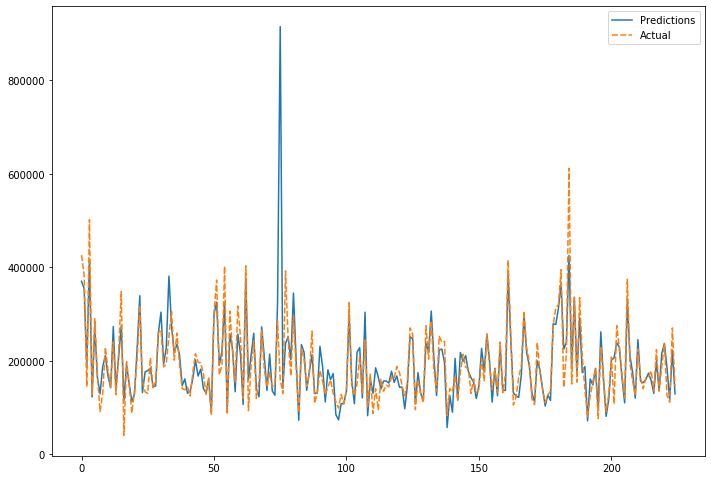

In [40]:
##################Modelling with Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = LinearRegression().fit(x_train,y_train)
reg_pred=pd.DataFrame(reg.predict(x_val))
reg_comparison=pd.DataFrame()
reg_comparison['Predictions']=reg_pred[0]
reg_comparison['Actual']=y_val.values
reg_comparison

#inverse transform
reg_comparison=pd.DataFrame(scaler.inverse_transform(reg_comparison),columns=['Predictions','Actual'])
print(reg_comparison)

#Metrics
#RMSE
print("RMSE:",mean_squared_error(reg_comparison['Actual'],reg_comparison['Predictions'])**0.5)
print("R-Squared",r2_score(reg_comparison['Actual'],reg_comparison['Predictions']))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=reg_comparison,color="red")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


     Predictions    Actual
0     373189.606  426000.0
1     338152.855  383970.0
2     141868.719  143900.0
3     524035.189  501837.0
4     115938.390  127000.0
..           ...       ...
220   248765.682  236500.0
221   150424.770  124900.0
222   130208.658  111000.0
223   207184.934  270000.0
224   125374.000  145000.0

[225 rows x 2 columns]
RMSE: 37860.895000378725
R-Squared 0.7844464440907265


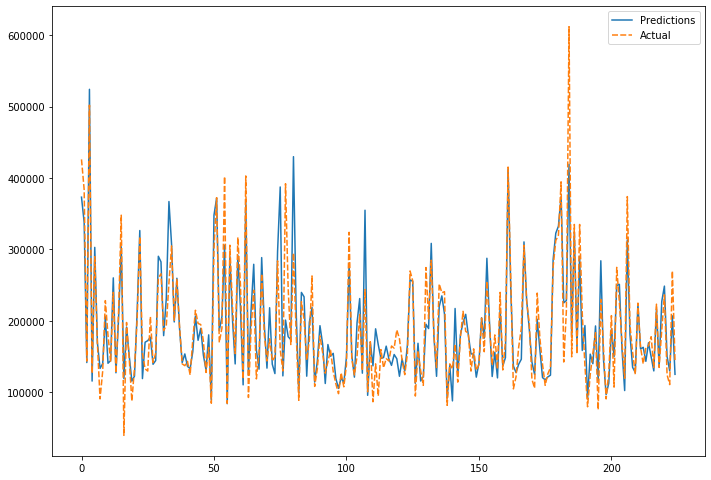

In [41]:
##################Modelling with random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, random_state=99)
reg.fit(x_train,y_train)

reg_pred=pd.DataFrame(reg.predict(x_val))
reg_comparison=pd.DataFrame()
reg_comparison['Predictions']=reg_pred[0]
reg_comparison['Actual']=y_val.values
reg_comparison

#inverse transform
reg_comparison=pd.DataFrame(scaler.inverse_transform(reg_comparison),columns=['Predictions','Actual'])
print(reg_comparison)

#Metrics
#RMSE
print("RMSE:",mean_squared_error(reg_comparison['Actual'],reg_comparison['Predictions'])**0.5)
print("R-Squared",r2_score(reg_comparison['Actual'],reg_comparison['Predictions']))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=reg_comparison,color="red")

In [42]:
##################Modelling with Neural Network
#We train our neural netwrok using pytorch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torch import sigmoid
from torch.utils.data import Dataset, DataLoader
import networkx as nx
import matplotlib.pyplot as plt
import math


#We use a simple two layer neural network with sigmoid
#Since it is a regression problem, the output layer will have no activation transformation
class Net(nn.Module):
    
    
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #Layer 1
        self.linear1=nn.Linear(D_in,H)
        #Xavier initialization of weights
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.zeros_(self.linear1.bias)
        
        #Layer 2
        self.linear2=nn.Linear(H,D_out)
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.zeros_(self.linear1.bias)


    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = self.linear2(x)
        
        return x
    

    
#Model definition
#13 inputs
D_in=13
#hidden layer has 14 units
H=14 
#one output value
D_out=1
model=Net(D_in,H,D_out)    
#Defining the optimizer and the loss function

#defining an RMSE loss function for the neural network
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)


#defining Adam optimizer
model=Net(D_in,H,D_out)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



epochs=300

#####changing the datatypes of the variables to torch
X_train=torch.tensor(x_train.values,dtype=torch.float32)
Y_train=torch.tensor(y_train.values,dtype=torch.float32)

X_val=torch.tensor(x_val.values,dtype=torch.float32)
Y_val=torch.tensor(y_val.values,dtype=torch.float32)


In [43]:
train_loss = []
for epoch in range(epochs):
    for i in range(0,len(X_train)):
        optimizer.zero_grad()
        z = model(X_train[i])
        loss = criterion(z,Y_train[i])
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())

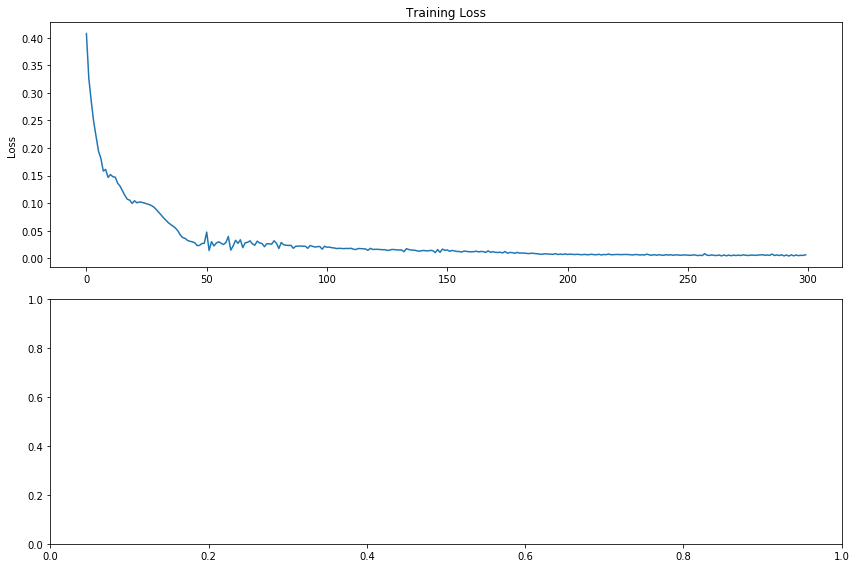

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')


plt.tight_layout()
plt.show()

       Predictions    Actual
0    427820.576369  426000.0
1    378346.291568  383970.0
2    188593.627330  143900.0
3    540162.385439  501837.0
4    133993.182581  127000.0
..             ...       ...
220  244870.912108  236500.0
221  168056.815837  124900.0
222  134114.531122  111000.0
223  226048.494903  270000.0
224  140107.052402  145000.0

[225 rows x 2 columns]
RMSE: 35427.72919100878
R-Squared 0.8112616856508224


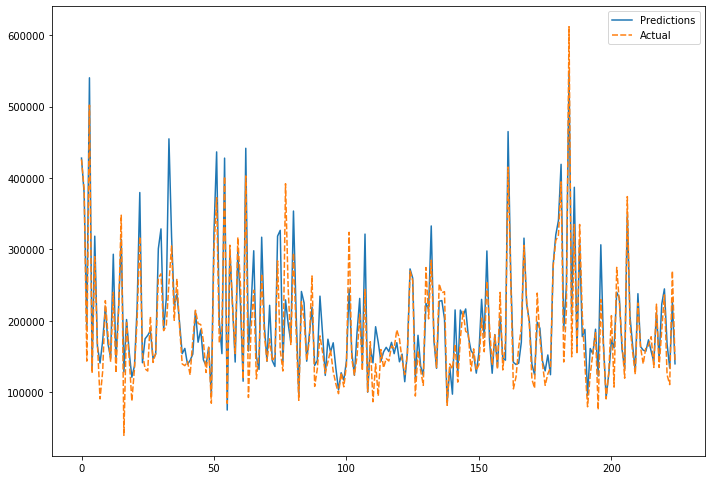

In [45]:
reg_pred=pd.DataFrame(model(X_val).data.numpy())
reg_comparison=pd.DataFrame()
reg_comparison['Predictions']=reg_pred[0]
reg_comparison['Actual']=y_val.values
reg_comparison

#inverse transform
reg_comparison=pd.DataFrame(scaler.inverse_transform(reg_comparison),columns=['Predictions','Actual'])
print(reg_comparison)

#Metrics
#RMSE
print("RMSE:",mean_squared_error(reg_comparison['Actual'],reg_comparison['Predictions'])**0.5)
print("R-Squared",r2_score(reg_comparison['Actual'],reg_comparison['Predictions']))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=reg_comparison,color="red")

In [ ]:
####Now to advance our modelling technique, we use grid search CV and ensemble of multiple models
#####We take 2 models - SVR, Randomforest

In [46]:
# defining cross validation strategy i.e RMSE
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [48]:
#We do the grid search CV of the whole dataset. It will automatically split the data into 
# traing and cross validation
#x_train,x_val,y_train,y_val=train_test_split(df2.iloc[:,0:13],df2.iloc[:,13:14],test_size=0.2,random_state=99)
from sklearn.model_selection import GridSearchCV

#1st random forest grid search CV
rfc=RandomForestRegressor(random_state=99)
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [4,5,6,7,8,9,10],
    
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(df2.iloc[:,0:13], df2.iloc[:,13:14])
CV_rfc.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 8, 'n_estimators': 200}

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


       Predictions    Actual
0    405151.194596  426000.0
1    368958.123576  383970.0
2    153929.073844  143900.0
3    498791.560641  501837.0
4    126110.772525  127000.0
..             ...       ...
220  244672.248686  236500.0
221  150230.343945  124900.0
222  125685.783128  111000.0
223  225593.263064  270000.0
224  129532.514439  145000.0

[225 rows x 2 columns]
RMSE: 22229.659124496487
R-Squared 0.9256914057104132


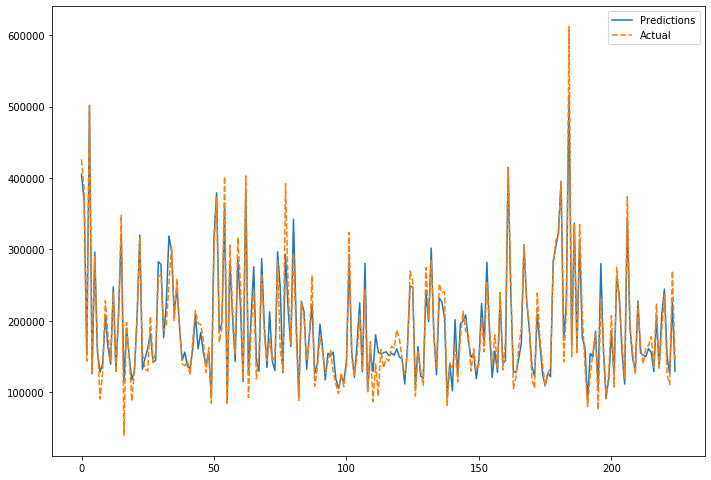

In [68]:
#So we get a max depth of 8 and n_estimators of 200
rfc_final=RandomForestRegressor(random_state=99, n_estimators= 200, max_depth=8)
rfc_final.fit(df2.iloc[:,0:13],df2.iloc[:,13:14])
reg_pred=pd.DataFrame(rfc_final.predict(x_val))
reg_comparison=pd.DataFrame()
reg_comparison['Predictions']=reg_pred[0]
reg_comparison['Actual']=y_val.values
reg_comparison

#inverse transform
reg_comparison=pd.DataFrame(scaler.inverse_transform(reg_comparison),columns=['Predictions','Actual'])

print(reg_comparison)

#Metrics
#RMSE
print("RMSE:",mean_squared_error(reg_comparison['Actual'],reg_comparison['Predictions'])**0.5)
print("R-Squared",r2_score(reg_comparison['Actual'],reg_comparison['Predictions']))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=reg_comparison,color="red")



In [58]:
#2nd SVR grid search CV
from sklearn import svm
from sklearn.svm import SVR
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(df2.iloc[:,0:13],df2.iloc[:,13:14])
clf.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       Predictions    Actual
0    364626.455011  426000.0
1    349941.746569  383970.0
2    186485.394143  143900.0
3    407969.103690  501837.0
4    126228.246799  127000.0
..             ...       ...
220  229779.464586  236500.0
221  181616.356793  124900.0
222  120645.158643  111000.0
223  217695.788458  270000.0
224  132521.732713  145000.0

[225 rows x 2 columns]
RMSE: 58527.92983567339
R-Squared 0.4848902553976977


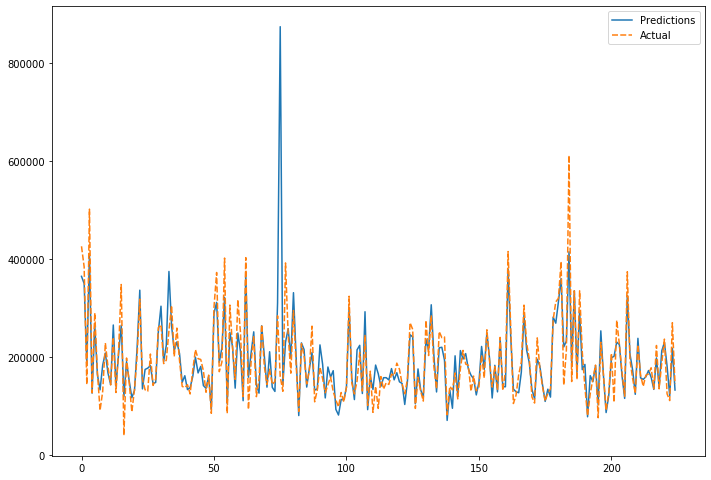

In [62]:
#SVR with best parameters
svr_final= SVR(kernel='linear', C=10, gamma=1e-07,epsilon= 0.1)
svr_final.fit(df2.iloc[:,0:13],df2.iloc[:,13:14])
reg_pred=pd.DataFrame(svr_final.predict(x_val))
reg_comparison=pd.DataFrame()
reg_comparison['Predictions']=reg_pred[0]
reg_comparison['Actual']=y_val.values
reg_comparison

#inverse transform
reg_comparison=pd.DataFrame(scaler.inverse_transform(reg_comparison),columns=['Predictions','Actual'])
print(reg_comparison)

#Metrics
#RMSE
print("RMSE:",mean_squared_error(reg_comparison['Actual'],reg_comparison['Predictions'])**0.5)
print("R-Squared",r2_score(reg_comparison['Actual'],reg_comparison['Predictions']))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=reg_comparison,color="red")



       Predictions    Actual
0    399361.946084  426000.0
1    366241.498289  383970.0
2    158579.976744  143900.0
3    485816.923934  501837.0
4    126127.554564  127000.0
..             ...       ...
220  242544.708100  236500.0
221  154714.060066  124900.0
222  124965.693916  111000.0
223  224465.052406  270000.0
224  129959.545621  145000.0

[225 rows x 2 columns]
RMSE: 25486.1745625225
R-Squared 0.9023251515147444


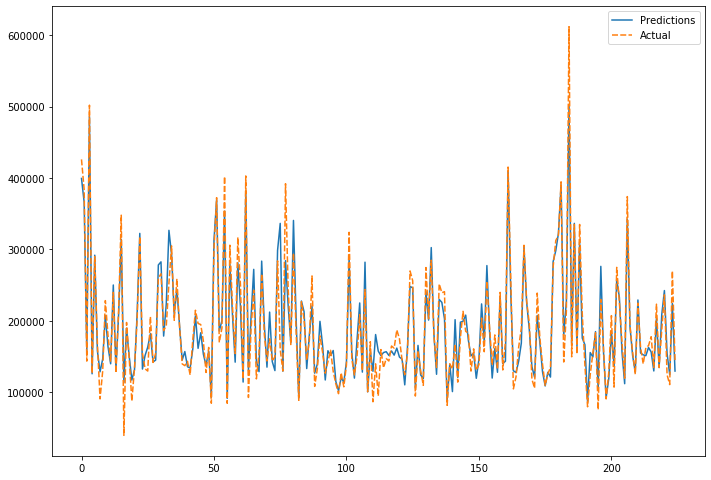

In [66]:
#ensemle (weighted averaging):

reg_pred=pd.DataFrame((6/7)*rfc_final.predict(x_val)+(1/7)*svr_final.predict(x_val))
reg_comparison=pd.DataFrame()
reg_comparison['Predictions']=reg_pred[0]
reg_comparison['Actual']=y_val.values
reg_comparison

#inverse transform
reg_comparison=pd.DataFrame(scaler.inverse_transform(reg_comparison),columns=['Predictions','Actual'])
#reg_comparison=pd.DataFrame(reg_comparison,columns=['Predictions','Actual'])
print(reg_comparison)

#Metrics
#RMSE
print("RMSE:",mean_squared_error(reg_comparison['Actual'],reg_comparison['Predictions'])**0.5)
print("R-Squared",r2_score(reg_comparison['Actual'],reg_comparison['Predictions']))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=reg_comparison,color="red")


In [ ]:
#perfect...Modelling complete :)